In [1]:
import numpy as np
import tensorflow as tf

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
x_data = np.linspace(0.0, 10.0, 1000000)

In [4]:
noise = np.random.randn(len(x_data))

In [6]:
noise.shape

(1000000,)

In [7]:
x_data

array([  0.00000000e+00,   1.00000100e-05,   2.00000200e-05, ...,
         9.99998000e+00,   9.99999000e+00,   1.00000000e+01])

### y = mx + b

#### b = 5

In [9]:
y_true = (0.5 * x_data) + 5 + noise

In [11]:
x_df = pd.DataFrame(data=x_data, columns=['X data'])

In [13]:
y_df = pd.DataFrame(data=y_true, columns=['y'])

In [14]:
x_df.head()

,X data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [25]:
my_data = pd.concat([pd.DataFrame(data=x_data,columns=['X Data']),pd.DataFrame(data=y_true,columns=['Y'])],axis=1)

In [26]:
my_data.head()

,X Data,Y
0,0.00000,4.194249
1,0.00001,3.304028
2,0.00002,4.293040
3,0.00003,4.710839
4,0.00004,3.646475


In [27]:
my_data.sample(n=250) # random samples

,X Data,Y
742994,7.429947,9.398650
485218,4.852185,6.923553
644153,6.441536,8.774368
526209,5.262095,8.754957
635423,6.354236,6.592635
611892,6.118926,9.696810
658127,6.581277,9.367344
248984,2.489842,7.362758
446800,4.468004,6.234000
170199,1.701992,4.624106


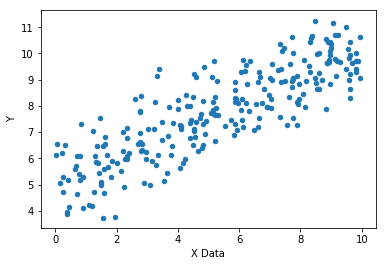

In [35]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')

#### si la cantidad de datos es muy grande, se hacen batches para que la maquina aprenda de a poquitos y no se demore mucho al leer un millon de datos de una

In [30]:
batch_size = 8

In [36]:
np.random.randn(2)

array([-0.75781869,  1.37928974])

## 1. Variables

In [37]:
m = tf.Variable(-1.64)
b = tf.Variable(1.49)

## 2. Placeholders

In [33]:
xph = tf.placeholder(tf.float32, [batch_size])

In [34]:
yph = tf.placeholder(tf.float32, [batch_size])

## 3. Error and Optimization

In [38]:
y_model = m * xph + b

In [39]:
error = tf.reduce_sum(tf.square(yph - y_model))

In [40]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

train = optimizer.minimize(error)

## 4. Instantiate

In [41]:
init = tf.global_variables_initializer()

In [63]:
with tf.Session() as sess:
    
    sess.run(init)
    
    batches = 1000 # each batch is a data point
    
    for i in range(batches):
        
        rand_index = np.random.randint(len(x_data), size=batch_size)
        
        feed = {
            xph: x_data[rand_index] ,
            yph: y_true[rand_index]
        }
        
        sess.run(train, feed_dict=feed)
        
    model_m, model_b = sess.run([m,b])
        

In [64]:
model_m # should be 0.5

0.48636001

In [65]:
model_b # should be 5

4.9820256

## 5. Graph Results

In [66]:
y_hat = x_data * model_m + model_b

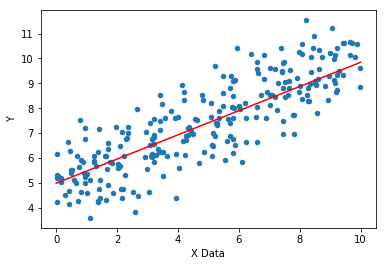

In [67]:
my_data.sample(250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data, y_hat, 'r')